In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

In [2]:
with open('StreamingHistory0.json', encoding="utf8") as sth0, \
    open('StreamingHistory1.json', encoding="utf8") as sth1, \
    open('StreamingHistory2.json', encoding="utf8") as sth2, \
    open('YourLibrary.json', encoding="utf8") as f:
    
    sth0= json.load(sth0)
    sth1= json.load(sth1)
    sth2= json.load(sth2)
    data= json.load(f)
    
    sth0 = pd.json_normalize(sth0)
    sth1 = pd.json_normalize(sth1)
    sth2 = pd.json_normalize(sth2)
    data = pd.json_normalize(data['tracks'])

In [3]:
spoti_data = pd.concat([sth0,sth1,sth2]).reset_index(drop=True)
spoti_data['endTime'] = spoti_data['endTime'].str[:4].astype('int')
spoti_data['msPlayed'] = (spoti_data['msPlayed']/1000)/60
spoti_data

,endTime,artistName,trackName,msPlayed
0,2020,Calla Cabro,25. Grandes Éxitos,0.594333
1,2020,Arctic Monkeys,Baby I'm Yours,2.543550
2,2020,One Direction,Steal My Girl,1.812783
3,2020,BTS,Dynamite,3.317550
4,2020,BLACKPINK,Lovesick Girls,3.212667
...,...,...,...,...
27065,2021,PARTYNEXTDOOR,ANOTHER DAY,0.091333
27066,2021,Rod Stewart,Da Ya Think I'm Sexy?,5.522217
27067,2021,Rod Stewart,Da Ya Think I'm Sexy?,5.522217
27068,2021,Rod Stewart,Da Ya Think I'm Sexy?,5.522217


In [4]:
song_time = spoti_data.groupby(['trackName'], as_index=False)['msPlayed'].sum()
song_time

,trackName,msPlayed
0,#01 LA VIRGINIDAD,6.980667
1,#7: Estereotipos que no nos dejan ser feliz.,0.286050
2,#ansolo,0.966833
3,$outh $ide $uicide,2.821983
4,'97 Bonnie & Clyde,0.081500
...,...,...
3317,空と虚,0.093250
3318,空に歌えば,0.038917
3319,紅蓮華,7.936100
3320,絶体絶命,0.033583


In [5]:
spoti_data = spoti_data.drop_duplicates(subset='trackName', keep="last")
spoti_data

,endTime,artistName,trackName,msPlayed
0,2020,Calla Cabro,25. Grandes Éxitos,0.594333
12,2020,Pusha T,Nosetalgia,0.163333
13,2020,Pusha T,Sweet Serenade,0.043667
14,2020,Pusha T,Santeria,0.037833
15,2020,Miles Davis,"So What (feat. John Coltrane, Cannonball Adder...",0.810000
...,...,...,...,...
27062,2021,Eladio Carrion,La H,2.054600
27063,2021,Arin Ray,Change (with Kehlani),2.634733
27064,2021,Trueno,FEEL ME??,0.084850
27065,2021,PARTYNEXTDOOR,ANOTHER DAY,0.091333


In [6]:
spoti_data = spoti_data.sort_values(by=['trackName'], ascending=True).reset_index(drop=True)

In [7]:
spoti_data.sort_values('msPlayed',ascending=False)

,endTime,artistName,trackName,msPlayed
1579,2021,Sin Paltas Podcast,La belleza,53.308933
25,2021,Calla Cabro,12. Los Impulsos,52.254500
84,2020,Calla Cabro,7. Los Corazones Rotos,46.034167
26,2020,Calla Cabro,12. Yo Perreo Sola,37.187500
2521,2021,Nada Espacial,Sin Valentín,36.649333
...,...,...,...,...
443,2021,Mike Bahía,Buscándote,0.000000
2500,2021,Manuel Medrano,Si Pudiera,0.000000
2494,2021,Becky G,Shower,0.000000
447,2021,Chet Baker,But Not For Me - Vocal Version,0.000000


In [8]:
spoti_data['Time(min)'] = song_time['msPlayed']
spoti_data= spoti_data.rename({'endTime':'Year','artistName': 'Artist', 'trackName': 'Song'}, axis=1)
spoti_data = spoti_data.drop(['msPlayed'], axis=1)
spoti_data = spoti_data.sort_values(by='Time(min)',ascending=False).reset_index(drop=True)

In [9]:
spoti_data

,Year,Artist,Song,Time(min)
0,2021,Vedo,You Got It,955.690417
1,2021,J. Cole,4 Your Eyez Only,834.291150
2,2021,Eladio Carrion,Problema,754.388217
3,2021,Blxst,Got It All,668.933683
4,2021,Blxst,Forever Humble,573.353333
...,...,...,...,...
3317,2021,Aminé,Campfire,0.000000
3318,2020,MARINA,Teen Idle,0.000000
3319,2021,MARINA,Living Dead,0.000000
3320,2021,Troye Sivan,WILD,0.000000


In [10]:
data= data.rename({'artist':'Artist','album': 'Album', 'track': 'Song'}, axis=1)
data

,Artist,Album,Song,uri
0,Billy Joel,Piano Man (Legacy Edition),Piano Man,spotify:track:70C4NyhjD5OZUMzvWZ3njJ
1,Gym Class Heroes,The Papercut Chronicles II,Ass Back Home (feat. Neon Hitch),spotify:track:3bfqkspKABT4pPicm6wC9F
2,Seven Lions,Worlds Apart,Worlds Apart,spotify:track:52UH1EJLO5Dk75Sy76xe5S
3,Blxst,No Love Lost,Got It All,spotify:track:5sHVIQEzTg8qcEstqlIig1
4,M2H,Así Empezó,Eres Tú,spotify:track:3IUTJ8jMD6E6GXql9fF0Zb
...,...,...,...,...
3007,Imagine Dragons,Night Visions,On Top Of The World,spotify:track:4eLSCSELtKxZwXnFbNLXT5
3008,Foxygen,How Can You Really,How Can You Really,spotify:track:1qY0j46pC8flm36R5E1ITB
3009,The Smashing Pumpkins,Being Beige,Being Beige,spotify:track:2VAuGWlBViH2aixmNLdSOr
3010,Trippie Redd,A Love Letter To You,Romeo & Juliet,spotify:track:6jT3etAOkvMUw0zsEw5QnR


In [11]:
final_data = spoti_data.merge(data, how='inner', on=['Song']).drop(columns=['Artist_y'])
final_data = final_data.rename({'Artist_x':'Artist'},axis=True)
final_data = final_data[['Year', 'Artist', 'Song', 'Album', 'Time(min)']]
final_data

,Year,Artist,Song,Album,Time(min)
0,2021,Vedo,You Got It,For You,955.690417
1,2021,J. Cole,4 Your Eyez Only,4 Your Eyez Only,834.291150
2,2021,Eladio Carrion,Problema,SEN2 KBRN VOL. 1,754.388217
3,2021,Blxst,Got It All,No Love Lost,668.933683
4,2021,Blxst,Forever Humble,No Love Lost,573.353333
...,...,...,...,...,...
1307,2021,LeRoyce,Therapy,The Sunny Nights Project,0.000000
1308,2020,MARINA,Teen Idle,Electra Heart,0.000000
1309,2021,MARINA,Living Dead,Electra Heart,0.000000
1310,2021,Troye Sivan,WILD,WILD,0.000000


In [12]:
sum_per_album = final_data.groupby(['Album'], as_index=False)['Time(min)'].sum().sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
sum_per_album['Album'] = sum_per_album['Album'].str.replace('$','S', regex=True)
sum_per_album

,Album,Time(min)
0,No Love Lost,2938.952817
1,2014 Forest Hills Drive,1963.447183
2,Shoot For The Stars Aim For The Moon,1713.233167
3,The Off-Season,1574.846533
4,For You,955.690417
...,...,...
859,A Thousand Years,0.000000
860,Lift Your Spirit,0.000000
861,Radioactive,0.000000
862,ROXANNE,0.000000


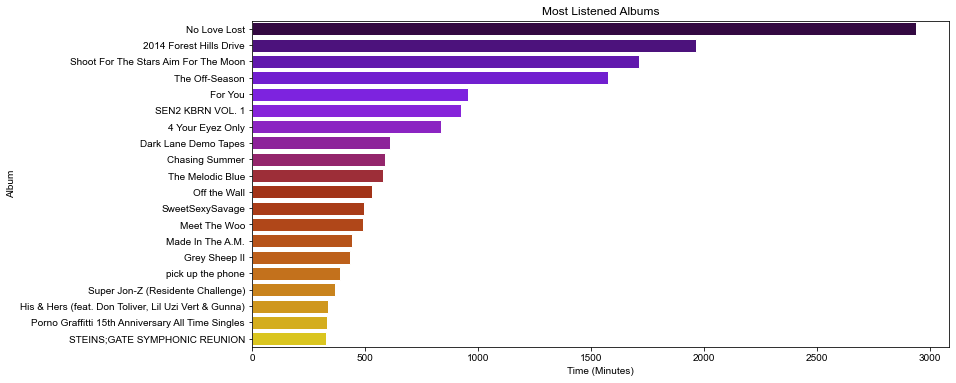

In [13]:
fig, ax = plt.subplots(figsize=(12.5,6))
palette = sns.color_palette("gnuplot",20)
#palette.reverse()

sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=sum_per_album['Album'][:20],x=sum_per_album['Time(min)'][:20],palette=palette)
plt.xlabel('Time (Minutes)')
plt.title('Most Listened Albums')
plt.savefig('MostListenedAlbums.png',format='png',bbox_inches = "tight")

In [14]:
blxst = final_data.loc[(final_data["Song"].str.contains("Blxst")) | (final_data['Artist']=='Blxst')].sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
#blxst['Time(min)'] = blxst['Time(min)'].div(60)
blxst

,Year,Artist,Song,Album,Time(min)
0,2021,Blxst,Got It All,No Love Lost,668.933683
1,2021,Blxst,Forever Humble,No Love Lost,573.353333
2,2021,Blxst,Gang Slide,No Love Lost,479.246483
3,2021,Blxst,Wrong or Right,No Love Lost,342.515100
4,2021,Blxst,Chosen (feat. Ty Dolla $ign),No Love Lost,214.418183
5,2021,Blxst,Be Alone,No Love Lost,209.504567
6,2021,Blxst,Hurt,No Love Lost,161.962350
7,2021,Blxst,No Love Lost,No Love Lost,154.396117
8,2021,Blxst,Pressure,No Love Lost,134.623000
9,2021,Blxst,Broke the Code,Broke the Code,23.797350


Text(0.5, 1.0, '2021 Most Listened Songs → Blxst')

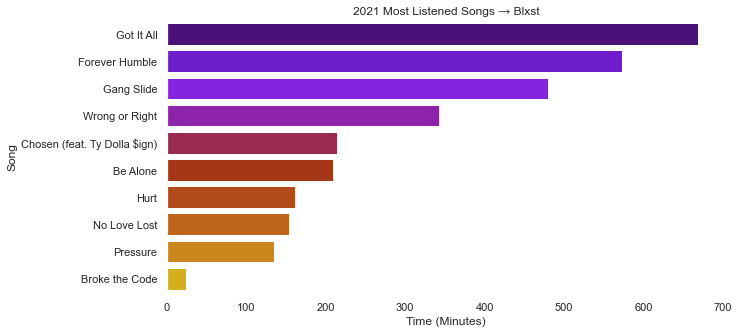

In [15]:
plt.figure(figsize=(10,5))
palette = sns.color_palette("gnuplot",len(blxst))
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=blxst['Song'],x=blxst['Time(min)'],palette=palette)
plt.xlabel('Time (Minutes)')
plt.title('2021 Most Listened Songs → Blxst')

In [16]:
jcole = final_data.loc[(final_data['Artist']=='J. Cole')].sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
jcole

,Year,Artist,Song,Album,Time(min)
0,2021,J. Cole,4 Your Eyez Only,4 Your Eyez Only,834.291150
1,2021,J. Cole,a m a r i,The Off-Season,419.401033
2,2021,J. Cole,m y . l i f e (with 21 Savage & Morray),The Off-Season,293.389400
3,2021,J. Cole,9 5 . s o u t h,The Off-Season,290.149583
4,2021,J. Cole,January 28th,2014 Forest Hills Drive,259.748067
5,2021,J. Cole,No Role Modelz,2014 Forest Hills Drive,258.764033
6,2021,J. Cole,Note to Self,2014 Forest Hills Drive,255.256550
7,2021,J. Cole,1 0 0 . m i l ‘ (with Bas),The Off-Season,254.625950
8,2021,J. Cole,03' Adolescence,2014 Forest Hills Drive,193.084467
9,2021,J. Cole,Work Out,Cole World: The Sideline Story,153.791450


In [17]:
jcole_albums = jcole.groupby(['Album'], as_index=False)['Time(min)'].sum().sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
jcole_albums

,Album,Time(min)
0,2014 Forest Hills Drive,1963.447183
1,The Off-Season,1574.846533
2,4 Your Eyez Only,834.364650
3,Cole World: The Sideline Story,153.791450
4,KOD,146.238267
5,Lewis Street,98.836267
6,Hello,62.530033
7,Born Sinner,59.479083
8,Snow On Tha Bluff,20.022067
9,MIDDLE CHILD,7.165767


Text(0.5, 1.0, '2021 Top 10 Albums -> J.Cole')

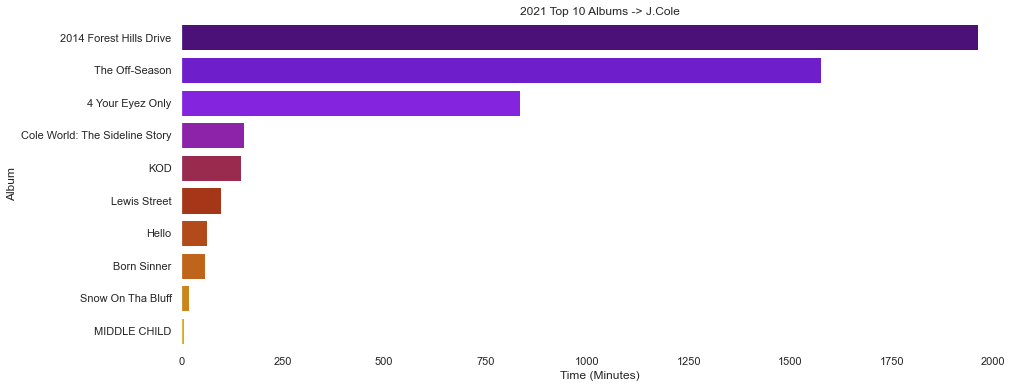

In [18]:
plt.figure(figsize=(15,6))
palette = sns.color_palette("gnuplot",len(jcole_albums[:10]))
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=jcole_albums['Album'][:10],x=jcole_albums['Time(min)'][:10],palette=palette)
plt.xlabel('Time (Minutes)')
plt.title('2021 Top 10 Albums -> J.Cole')

Text(0.5, 1.0, '2021 Top 10 Songs → J.Cole')

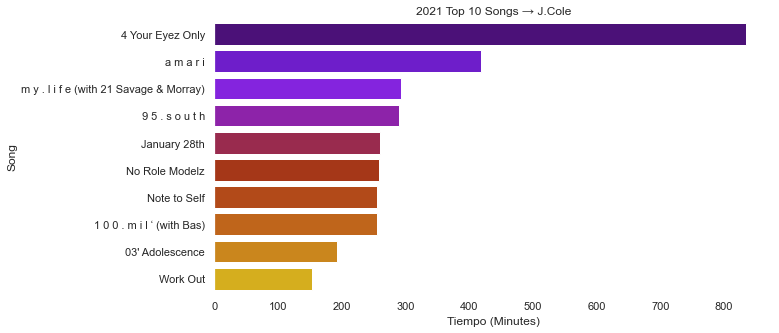

In [19]:
plt.figure(figsize=(10,5))
palette = sns.color_palette("gnuplot",len(jcole[:10]))
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=jcole['Song'][:10],x=jcole['Time(min)'][:10],palette=palette)
plt.xlabel('Tiempo (Minutes)')
plt.title('2021 Top 10 Songs → J.Cole')

In [20]:
categories = list(sum_per_album['Album'][:7])
most_albums = list(sum_per_album['Time(min)'][:7].round(2))

categories = np.concatenate((categories, [categories[0]]))
most_albums = np.concatenate((most_albums, [most_albums[0]]))


fig = go.Figure(
    data=[
        go.Scatterpolar(r=most_albums, theta=categories, fill='toself', name='Albums')
    ],
    layout=go.Layout(
        template='plotly_dark',
        title=go.layout.Title(text='Top 10 2021 Most Listened Albums'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

In [21]:
final_data.loc[final_data['Artist']=='Blxst']

,Year,Artist,Song,Album,Time(min)
3,2021,Blxst,Got It All,No Love Lost,668.933683
4,2021,Blxst,Forever Humble,No Love Lost,573.353333
5,2021,Blxst,Gang Slide,No Love Lost,479.246483
14,2021,Blxst,Wrong or Right,No Love Lost,342.515100
50,2021,Blxst,Chosen (feat. Ty Dolla $ign),No Love Lost,214.418183
51,2021,Blxst,Be Alone,No Love Lost,209.504567
63,2021,Blxst,Hurt,No Love Lost,161.962350
67,2021,Blxst,No Love Lost,No Love Lost,154.396117
82,2021,Blxst,Pressure,No Love Lost,134.623000
355,2021,Blxst,Broke the Code,Broke the Code,23.797350


In [22]:
sum_per_album

,Album,Time(min)
0,No Love Lost,2938.952817
1,2014 Forest Hills Drive,1963.447183
2,Shoot For The Stars Aim For The Moon,1713.233167
3,The Off-Season,1574.846533
4,For You,955.690417
...,...,...
859,A Thousand Years,0.000000
860,Lift Your Spirit,0.000000
861,Radioactive,0.000000
862,ROXANNE,0.000000


In [23]:
sum_per_album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Album      864 non-null    object 
 1   Time(min)  864 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.6+ KB


In [24]:
final_data

,Year,Artist,Song,Album,Time(min)
0,2021,Vedo,You Got It,For You,955.690417
1,2021,J. Cole,4 Your Eyez Only,4 Your Eyez Only,834.291150
2,2021,Eladio Carrion,Problema,SEN2 KBRN VOL. 1,754.388217
3,2021,Blxst,Got It All,No Love Lost,668.933683
4,2021,Blxst,Forever Humble,No Love Lost,573.353333
...,...,...,...,...,...
1307,2021,LeRoyce,Therapy,The Sunny Nights Project,0.000000
1308,2020,MARINA,Teen Idle,Electra Heart,0.000000
1309,2021,MARINA,Living Dead,Electra Heart,0.000000
1310,2021,Troye Sivan,WILD,WILD,0.000000


In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1312 non-null   int32  
 1   Artist     1312 non-null   object 
 2   Song       1312 non-null   object 
 3   Album      1312 non-null   object 
 4   Time(min)  1312 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 56.4+ KB


In [26]:
final_data.to_excel('DataSpotify.xlsx',index=False)
sum_per_album.to_excel('DataAlbums.xlsx',index=False)